In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [6]:
data = pd.read_csv('DMV_Written_Tests.csv')
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [8]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

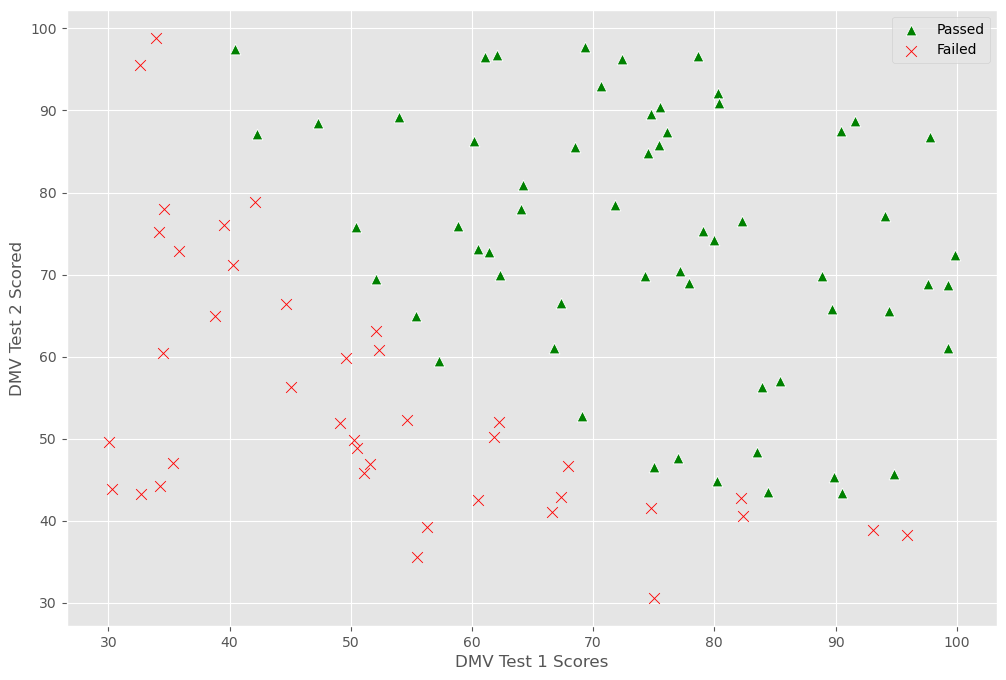

In [9]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)
ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                    y = scores[passed[:, 0], 1],
                    marker = '^',
                    color = 'green',
                    s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                    y = scores[failed[:, 0], 1],
                    marker = 'x',
                    color = 'red',
                    s = 60)
ax.set(xlabel = 'DMV Test 1 Scores', ylabel = 'DMV Test 2 Scored')
ax.legend(['Passed', 'Failed'])
plt.show()

### Defining the Logistic Sigmoid Function 

In [10]:
def logistic_function(z):
    return 1/(1 + np.exp(-z))

In [11]:
logistic_function(0)

0.5

###  Computing the Cost Function $J(\theta)$ and Gradient

In [12]:
def compute_cost(w, b, x, y):
    m = len(y)
    y_hat = logistic_function(np.dot(x, w) + b)
    error = -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
    cost = np.sum(error) / m 
    dz = y_hat - y  
    dw = np.dot(x.T, dz) / m  
    db = np.sum(dz) / m       

    return cost, dw, db

### Cost and Gradient at Initialization

In [13]:
# mean_scores = np.mean(scores, axis = 0)
# std_scores = np.std(scores, axis = 0)
# scores = (scores-mean_scores) / std_scores

n_features = scores.shape[1]  # x.shape[1] gives the number of columns (features)

# Initialize weights and bias
w = np.zeros(n_features)  # A zero vector with the same size as the number of features
b = 0 
cost, dw, db = compute_cost(w, b, scores, results)
print(f"Initial Cost: {cost}")

Initial Cost: 0.6931471805599453


### Gradient Descent

In [14]:
def gradient_descent(x, y, w, b, lr, iterations):
    costs = []
    for i in range(iterations):
        cost, dw, db = compute_cost(w, b, x, y)
        w = w - lr*dw
        b = b - lr*db
        costs.append(cost)
        if i % (iterations // 10) == 0:
            print(f"Iteration: {i}, Cost: {cost}")
    return w, b, costs

In [23]:
w, b, costs = gradient_descent(scores, results, w, b, 0.001, 10000)

Iteration: 0, Cost: 0.204039104516419
Iteration: 1000, Cost: 0.20403882175773042
Iteration: 2000, Cost: 0.2040385391371921
Iteration: 3000, Cost: 0.2040382566547433
Iteration: 4000, Cost: 0.20403797431032383
Iteration: 5000, Cost: 0.20403769210387337
Iteration: 6000, Cost: 0.20403741003533163
Iteration: 7000, Cost: 0.20403712810463814
Iteration: 8000, Cost: 0.20403684631173286
Iteration: 9000, Cost: 0.20403656465655545


### Plotting the Convergence of $J(\theta)$

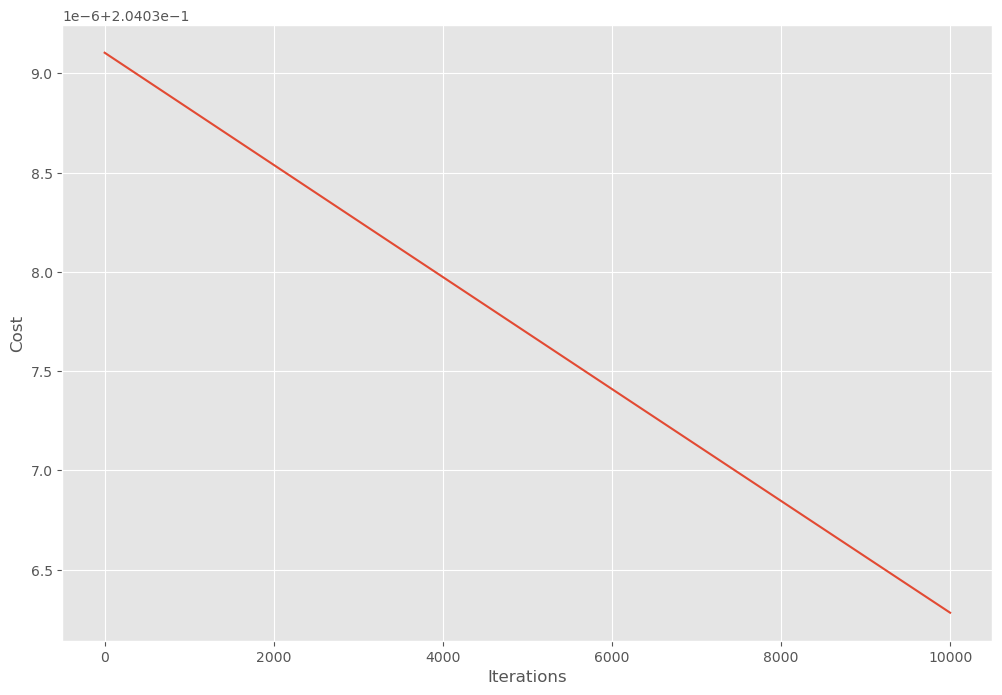

In [25]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### Plotting the decision boundary

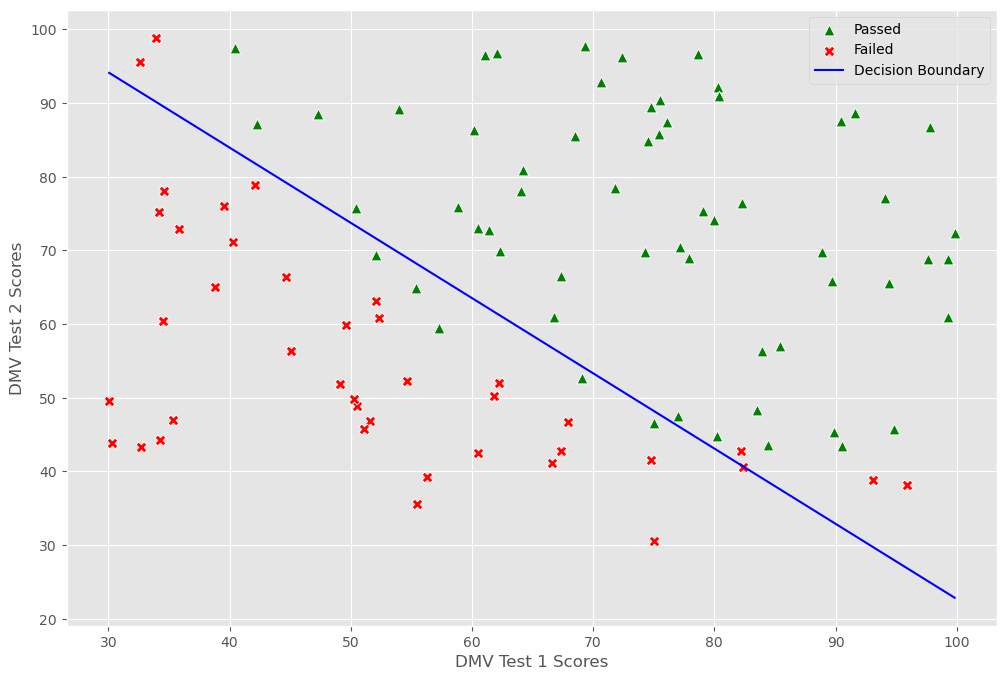

In [26]:
# Scatter plot for passed and failed
ax = sns.scatterplot(x=scores[passed[:, 0], 0],
                     y=scores[passed[:, 0], 1],
                     marker='^',
                     color='green',
                     s=60, label='Passed')
sns.scatterplot(x=scores[failed[:, 0], 0],
                y=scores[failed[:, 0], 1],
                marker='X',
                color='red',
                s=60, label='Failed')

# Define decision boundary
x_values = np.linspace(scores[:, 0].min(), scores[:, 0].max(), 100)
y_values = -(w[0] / w[1]) * x_values - (b / w[1])

# Plot decision boundary
plt.plot(x_values, y_values, label='Decision Boundary', color='blue')

# Add labels and legend
ax.set(xlabel='DMV Test 1 Scores', ylabel='DMV Test 2 Scores')
plt.legend()
plt.show()


### Predictions using the optimized $\theta$ values

In [27]:
def predict(w, b, x):
    results = np.dot(x, w) + b
    return results > 0

In [28]:
p = predict(w, b, scores)
print(f"{sum(p == results)}%")

90%


In [31]:
test = np.array([50, 79])
z = np.dot(w, test) + b
prob = logistic_function(z)
print(prob)

0.758302773651649
